In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 

def read_dataset(feature_file, label_file):
    ''' Read data set in *.csv to data frame in Pandas'''
    df_X = pd.read_csv(feature_file)
    df_y = pd.read_csv(label_file)
    X = df_X.values # convert values in dataframe to numpy array (features)
    y = df_y.values # convert values in dataframe to numpy array (label)
    return X, y


def normalize_features(X_train, X_test):
    from sklearn.preprocessing import StandardScaler #import libaray
    scaler = StandardScaler() # call an object function
    scaler.fit(X_train) # calculate mean, std in X_train
    X_train_norm = scaler.transform(X_train) # apply normalization on X_train
    X_test_norm = scaler.transform(X_test) # we use the same normalization on X_test
    return X_train_norm, X_test_norm


def one_hot_encoder(y_train, y_test):
    ''' convert label to a vector under one-hot-code fashion '''
    from sklearn import preprocessing
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    y_train_ohe = lb.transform(y_train)
    y_test_ohe = lb.transform(y_test)
    return y_train_ohe, y_test_ohe

def accuracy(ypred, yexact):
    p = np.array(ypred == yexact, dtype = int)
    return np.sum(p)/float(len(yexact))

In [2]:
#PLOTTING
import matplotlib.pyplot as plt
import IPython
%matplotlib inline

def plot_digit(feature_vector):
    dim = int(np.sqrt(len(feature_vector)))
    plt.gray()
    plt.matshow(feature_vector.reshape(dim,dim))
    plt.show()

def plot_test(index1,index2,clearn,X,Xn,y):
    for index in range(index1,index2):
        print('Image:',index)
        plot_digit(X[index])
        ypred = clearn.predict(Xn[index].reshape(1,-1))
        print('Label:', int(y[index]))
        print('Prediction:',int(ypred))
        print('')
        
def tally_matrix(y_test,pred):
    length = np.max(y_test)
    total=np.zeros(length)
    tal=np.zeros((length,length))
    for i in range(len(y_test)):
        y=int(y_test[i]-1)
        p=int(pred[i]-1)
        tal[y][p]+=1
        total[y]+=1
    for index in range(tal.shape[0]):
        tal[index] *= 100/total[index]
    return tal
        
def tally_matrix_no_diag(y_test,pred):
    length = np.max(y_test)
    total=np.zeros(length)
    tal=np.zeros((length,length))
    for i in range(len(y_test)):
        y=int(y_test[i]-1)
        p=int(pred[i]-1)
        if(y!=p):
            tal[y][p]+=1
        total[y]+=1
    for index in range(tal.shape[0]):
        tal[index] *= 100/total[index]
    return tal

In [3]:
X_train, y_train = read_dataset('X_train.csv', 'y_train.csv')
X_test, y_test = read_dataset('X_test.csv', 'y_test.csv')
X_train_norm, X_test_norm = normalize_features(X_train, X_test)
y_train_ohe, y_test_ohe = one_hot_encoder(y_train, y_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(np.min(y_train),np.max(y_train))

(1199, 1024)
(239, 1024)
(1199, 1)
(239, 1)
1 20


In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
l1=20
NN = MLPClassifier(solver='sgd',\
                        alpha=1e-5,\
                        hidden_layer_sizes=(l1),\
                        random_state=1,\
                        learning_rate_init=0.005,\
                        max_iter=200)        
print('NeuralNetwork SGD %dN: %f' % (l1,NN.fit(X_train_norm, y_train.ravel()).score(X_test_norm, y_test.ravel())))

NN.fit(X_train_norm, y_train.ravel())
ypred = NN.predict(X_test_norm)
print(accuracy(y_test.ravel(),ypred.ravel()))

#plt.matshow(tally_matrix_no_diag(y_test.ravel(),ypred.ravel()))
#plot_test(0,len(y_test),NN,X_test,X_test_norm,y_test.ravel())

NeuralNetwork SGD 20N: 0.991632
0.9916317991631799


NeuralNetwork LBFGS 20N: 0.979079
0.9790794979079498


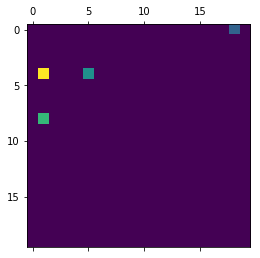

In [29]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
l1=20
NN = MLPClassifier(solver='lbfgs',\
                        alpha=1e-5,\
                        hidden_layer_sizes=(l1),\
                        random_state=1,\
                        learning_rate_init=0.005,\
                        max_iter=200)        
print('NeuralNetwork LBFGS %dN: %f' % (l1,NN.fit(X_train_norm, y_train.ravel()).score(X_test_norm, y_test.ravel())))

NN.fit(X_train_norm, y_train.ravel())
ypred = NN.predict(X_test_norm)
print(accuracy(y_test.ravel(),ypred.ravel()))

plt.matshow(tally_matrix_no_diag(y_test.ravel(),ypred.ravel()))

RandomForest 10N: 0.991632
0.9832635983263598


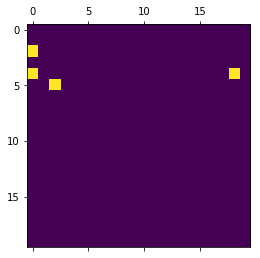

In [28]:
from sklearn.ensemble import RandomForestClassifier
n = 10
RandomForest = RandomForestClassifier(n_estimators=n)
print('RandomForest %dN: %f' % (n, RandomForest.fit(X_train_norm, y_train.ravel()).score(X_test_norm, y_test.ravel())))

RandomForest.fit(X_train_norm, y_train.ravel())
ypred = RandomForest.predict(X_test_norm)
print(accuracy(y_test.ravel(),ypred.ravel()))

plt.matshow(tally_matrix_no_diag(y_test.ravel(),ypred.ravel()))

DecisionTree: 0.874477
0.891213389121339


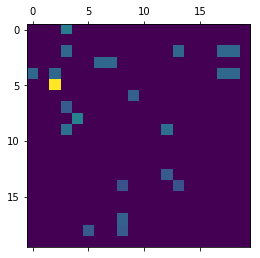

In [27]:
from sklearn import tree
decisiontree = tree.DecisionTreeClassifier()
print('DecisionTree: %f' %(decisiontree.fit(X_train_norm, y_train).score(X_test_norm,y_test.ravel())))

decisiontree.fit(X_train_norm, y_train.ravel())
ypred = decisiontree.predict(X_test_norm)
print(accuracy(y_test.ravel(),ypred.ravel()))

plt.matshow(tally_matrix_no_diag(y_test.ravel(),ypred.ravel()))

SupportVectorMachine: 0.987448
0.9874476987447699


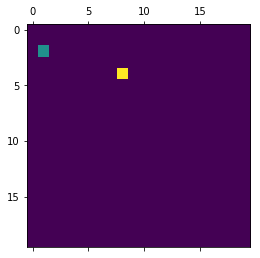

In [26]:
from sklearn import svm
SVM = svm.SVC(gamma='scale')
print('SupportVectorMachine: %f' %(SVM.fit(X_train_norm, y_train.ravel()).score(X_test_norm,y_test.ravel())))

SVM.fit(X_train_norm, y_train.ravel())
ypred = SVM.predict(X_test_norm)
print(accuracy(y_test.ravel(),ypred.ravel()))

plt.matshow(tally_matrix_no_diag(y_test.ravel(),ypred.ravel()))

In [9]:
from sklearn import svm
LinearSVM = svm.LinearSVC()
print('LinearSVM: %f' %(LinearSVM.fit(X_train_norm, y_train.ravel()).score(X_test_norm,y_test.ravel())))

LinearSVM: 0.962343


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [33]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
kernel = RBF()
GRP = GaussianProcessRegressor(kernel=kernel,random_state=0)
print('GPR RBF: %f' %(GRP.fit(X_train_norm, y_train.ravel()).score(X_test_norm,y_test.ravel())))


GPR RBF: 0.962230


KNN 2N: 0.983264
0.9832635983263598


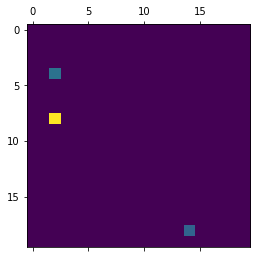

In [21]:
from sklearn.neighbors import KNeighborsClassifier
n=2
NBRS = KNeighborsClassifier(n_neighbors=n, algorithm='ball_tree')
print('KNN %dN: %f' %(n,NBRS.fit(X_train_norm, y_train.ravel()).score(X_test_norm,y_test.ravel())))

NBRS.fit(X_train_norm, y_train.ravel())
ypred = NBRS.predict(X_test_norm)
print(accuracy(y_test.ravel(),ypred.ravel()))

plt.matshow(tally_matrix_no_diag(y_test.ravel(),ypred.ravel()))